# Machine Learning Homework 3

importing Libraries:

In [76]:
#ploting and Data presentation libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns

#SkLearn Librairies
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Introduction:

The goal is to build a predictive model that can classify employees into one of the following categories:

1.Active: Employees who are currently active and still employed.
2.Voluntarily Terminated: Employees who have voluntarily terminated their employment.
3. Terminated for Cause: Employees who have been terminated for cause.

The classification models aim to use various features or attributes of the employees (e.g., performance scores, demographics, satisfaction survey responses) to predict their employment status. The models learn patterns and relationships from the training data and then make predictions on unseen data.

first we will begin our journy with Data exploration and data preproccessing phases:


# Section A - Data exploration: 

In [2]:
# Load the CSV file
df = pd.read_csv('Human_Resuorces_Analytics.csv')

# Display the DataFrame
print("Data:")
print(df.head())

# Display metadata about the DataFrame
print("\nMetadata:")
print(df.info())
df

Data:
              Employee_Name  EmpID  MarriedID  MaritalStatusID  GenderID  \
0       Adinolfi, Wilson  K  10026          0                0         1   
1  Ait Sidi, Karthikeyan     10084          1                1         1   
2         Akinkuolie, Sarah  10196          1                1         0   
3              Alagbe,Trina  10088          1                1         0   
4          Anderson, Carol   10069          0                2         0   

   EmpStatusID  DeptID  PerfScoreID  FromDiversityJobFairID  Salary  ...  \
0            1       5            4                       0   62506  ...   
1            5       3            3                       0  104437  ...   
2            5       5            3                       0   64955  ...   
3            1       5            3                       0   64991  ...   
4            5       5            3                       0   50825  ...   

      ManagerName  ManagerID RecruitmentSource PerformanceScore  \
0  Michael Al

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,...,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,9/2/2015,5,4
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,...,Simon Roup,4.0,Employee Referral,Fully Meets,5.00,3,5,2/1/2019,0,11


# diversity profile
This pie chart and bar chart provide a visual representation of the distribution of employees across different racial groups, we can see that there are more whites then 

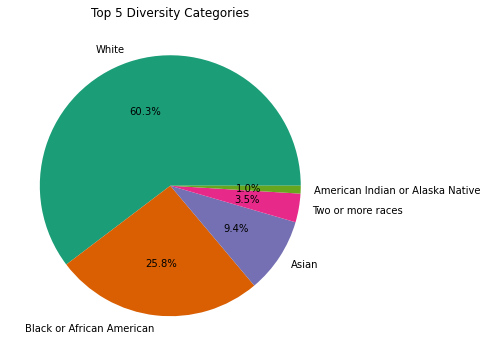

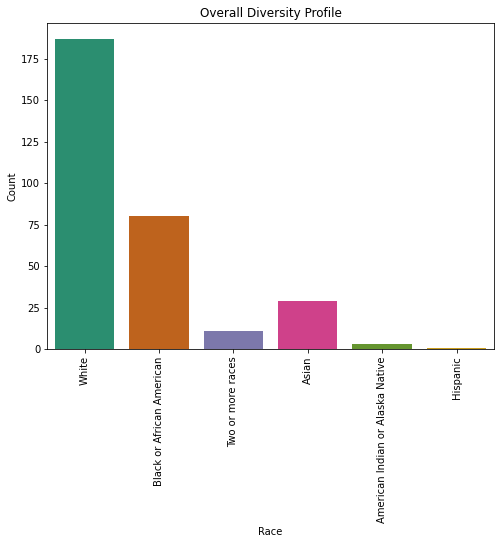

In [3]:

# Set the color palette
colors = sns.color_palette('Dark2')
# Top 5 diversity categories - Pie chart
top5_race = df['RaceDesc'].value_counts().nlargest(5)
plt.figure(figsize=(8, 6))
top5_race.plot(kind='pie', autopct='%1.1f%%', colors=colors)
plt.title('Top 5 Diversity Categories')
plt.ylabel('')
plt.show()
# Overall diversity profile - Bar chart
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='RaceDesc', palette=colors)
plt.title('Overall Diversity Profile')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Relationship between performance score and who a person works for 


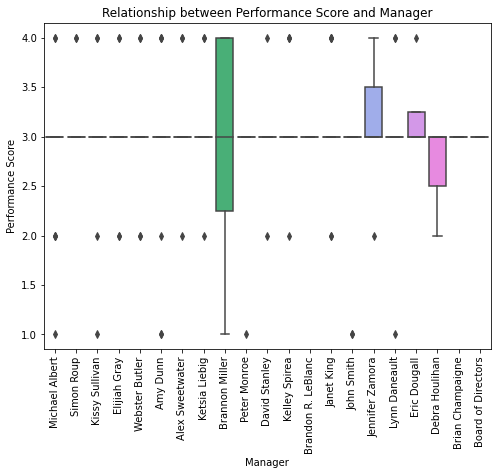

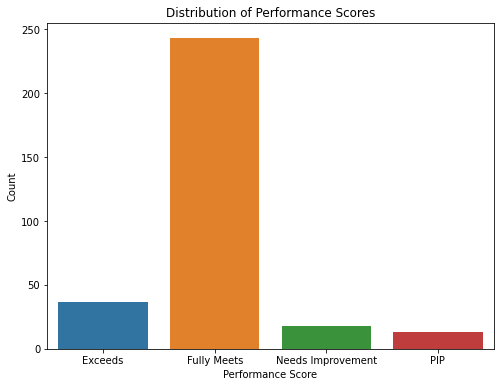

In [4]:

# Relationship between performance score and who a person works for
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='ManagerName', y='PerfScoreID')
plt.title('Relationship between Performance Score and Manager')
plt.xlabel('Manager')
plt.ylabel('Performance Score')
plt.xticks(rotation=90)
plt.show()

# Example: Distribution of performance scores
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='PerformanceScore')
plt.title('Distribution of Performance Scores')
plt.xlabel('Performance Score')
plt.ylabel('Count')
plt.show()


# Areas of the company where pay is not equitable:


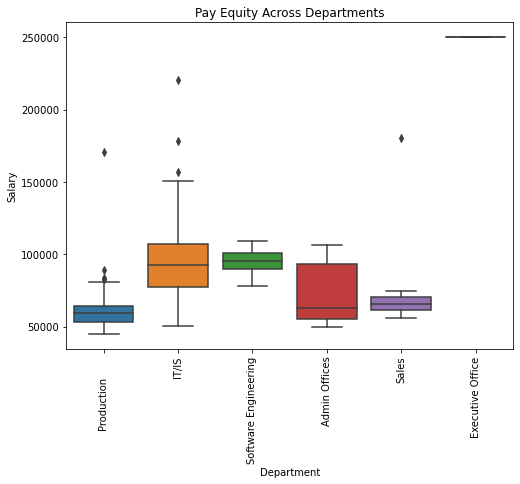

In [5]:

# Pay equity across departments
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Department', y='Salary')
plt.title('Pay Equity Across Departments')
plt.xlabel('Department')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()



# Additional visualization 1:

# Example: Employee satisfaction levels

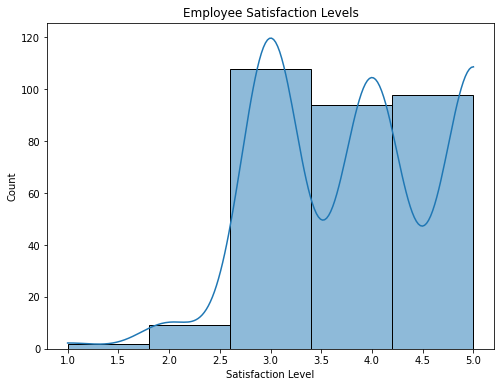

In [6]:
# Additional visualization 1
# Example: Employee satisfaction levels
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='EmpSatisfaction', bins=5, kde=True)
plt.title('Employee Satisfaction Levels')
plt.xlabel('Satisfaction Level')
plt.ylabel('Count')
plt.show()



In [7]:
# Additional visualization 2


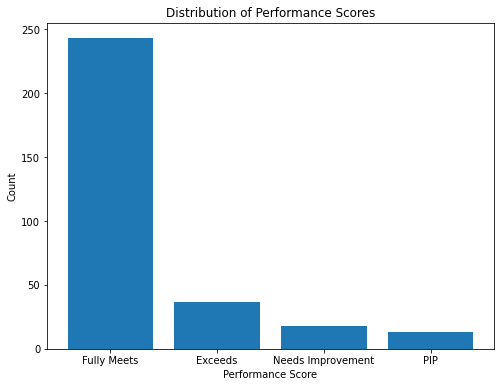

In [8]:
#Stacked bar plot for distribution of performance scores

performance_counts = df['PerformanceScore'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(performance_counts.index, performance_counts.values)
plt.title('Distribution of Performance Scores')
plt.xlabel('Performance Score')
plt.ylabel('Count')
plt.show()

# Section A - Data Pre-processing:
Pre-processing the data is an essential step to ensure that the data is in a suitable format and to address any issues that might affect the performance of the models.



In [9]:
# Drop irrelevant columns
df = df.drop(['Employee_Name', 'EmpID'], axis=1)

# Handle missing values (if any)
df = df.dropna()  # Drop rows with missing values, or use imputation if appropriate

# Encode categorical variables
categorical_cols = ['MaritalStatusID', 'GenderID', 'RecruitmentSource', 'PerformanceScore']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Standardize numerical features
numerical_cols = ['Salary', 'EngagementSurvey', 'EmpSatisfaction']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Convert date/time features
df['LastPerformanceReview_Date'] = pd.to_datetime(df['LastPerformanceReview_Date'])
df['Review_Year'] = df['LastPerformanceReview_Date'].dt.year
df['Review_Month'] = df['LastPerformanceReview_Date'].dt.month

# Drop the original date/time feature
df = df.drop('LastPerformanceReview_Date', axis=1)

# Display the preprocessed dataset
print(df.head())


    MarriedID  MaritalStatusID  GenderID  EmpStatusID  DeptID  PerfScoreID  \
1           1                1         1            5       3            3   
2           1                1         0            5       5            3   
4           0                2         0            5       5            3   
10          1                1         0            5       5            3   
11          1                1         1            5       5            3   

    FromDiversityJobFairID    Salary  Termd  PositionID  ... ManagerID  \
1                        0  2.084314      1          27  ...       4.0   
2                        0 -0.039542      1          20  ...      20.0   
4                        0 -0.799637      1          19  ...      39.0   
10                       1 -0.592803      1          19  ...      14.0   
11                       1 -0.994045      1          19  ...      20.0   

   RecruitmentSource  PerformanceScore EngagementSurvey EmpSatisfaction  \
1          

# Section B - Dimensionality Reduction

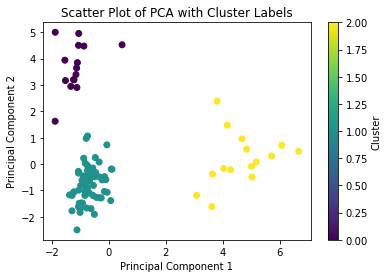

In [94]:
# Select the relevant columns for PCA
columns_for_pca = ['MarriedID', 'MaritalStatusID', 'GenderID', 'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID', 'Salary', 'ManagerID', 'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount', 'DaysLateLast30', 'Absences']
df = df[columns_for_pca]

# Handle missing values (NaN) by mean imputation
df = df.fillna(df.mean())

# Encode categorical columns (if any)
categorical_columns = ['PerformanceScore']  # Add other categorical columns here
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Perform feature scaling
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_scaled)

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(df_scaled)

# Get the feature contributions for PC1 and PC2
feature_contributions = pd.DataFrame(pca.components_, columns=df_encoded.columns)

# Retrieve the feature importances for PC1 and PC2
pc1_features = feature_contributions.iloc[0]
pc2_features = feature_contributions.iloc[1]


# Create a scatter plot to visualize the results with different colors for each cluster
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of PCA with Cluster Labels')
plt.colorbar(label='Cluster')
plt.show()


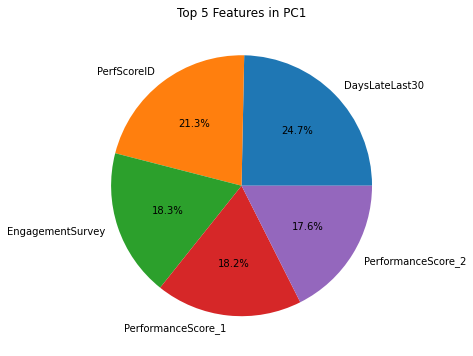

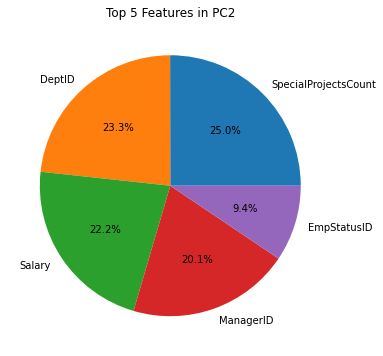

In [95]:

# Get the feature contributions for PC1 and PC2
feature_contributions = pd.DataFrame(pca.components_, columns=df_encoded.columns)

# Retrieve the feature importances for PC1 and PC2
pc1_features = feature_contributions.iloc[0]
pc2_features = feature_contributions.iloc[1]

# Get the absolute values of feature contributions for PC1 and PC2
pc1_abs_contributions = np.abs(pc1_features)
pc2_abs_contributions = np.abs(pc2_features)

# Determine the top 5 most significant features for PC1 and PC2
top_pc1_features = pc1_abs_contributions.nlargest(5)
top_pc2_features = pc2_abs_contributions.nlargest(5)

# Create pie chart for PC1 features
plt.figure(figsize=(8, 6))
plt.pie(top_pc1_features, labels=top_pc1_features.index, autopct='%1.1f%%')
plt.title('Top 5 Features in PC1')
plt.show()

# Create pie chart for PC2 features
plt.figure(figsize=(8, 6))
plt.pie(top_pc2_features, labels=top_pc2_features.index, autopct='%1.1f%%')
plt.title('Top 5 Features in PC2')
plt.show()


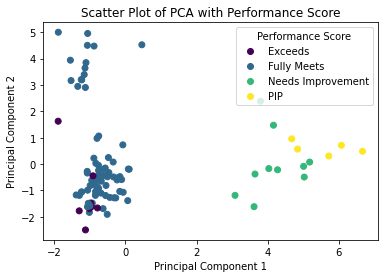

In [96]:
performance_score = df['PerformanceScore']

scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=performance_score, cmap='viridis')

# Define the legend labels
legend_labels = ['Exceeds', 'Fully Meets', 'Needs Improvement', 'PIP']

plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title='Performance Score')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of PCA with Performance Score')
plt.show()


from the PCA Dimensionality Reduction we can clearly see the differnet cluster's.

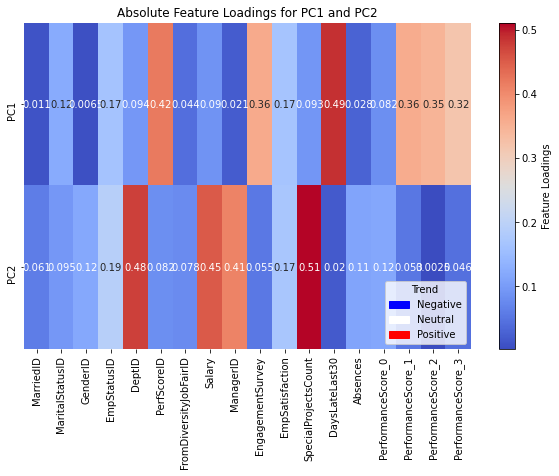

In [75]:
component_loadings = pd.DataFrame(pca.components_, columns=df_encoded.columns, index=['PC1', 'PC2'])

plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(component_loadings.abs(), annot=True, cmap='coolwarm', cbar=False)
plt.title('Absolute Feature Loadings for PC1 and PC2')

# Add a colorbar and legend
cbar = plt.colorbar(heatmap.collections[0])
cbar.set_label('Feature Loadings')
legend_labels = ['Negative', 'Neutral', 'Positive']
legend_handles = [patches.Patch(color='blue', label='Negative'),
                  patches.Patch(color='white', label='Neutral'),
                  patches.Patch(color='red', label='Positive')]
plt.legend(handles=legend_handles, labels=legend_labels, title='Trend', loc='lower right')

plt.show()


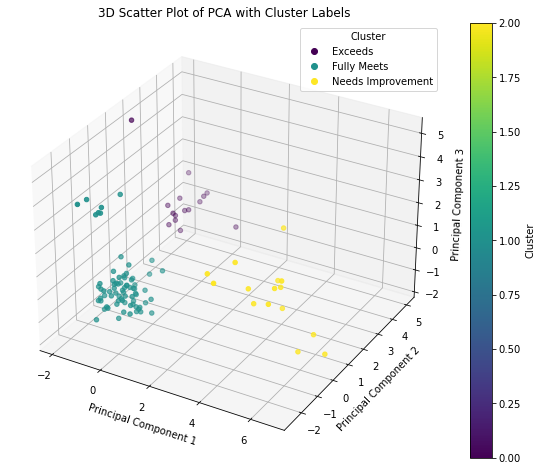

In [91]:

# Perform PCA with 3 components
pca = PCA(n_components=3) 
X_pca = pca.fit_transform(df_scaled)

# Create a 3D scatter plot to visualize the results with different colors for each cluster
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=cluster_labels, cmap='viridis')

# Add a colorbar and legend
cbar = plt.colorbar(scatter)
cbar.set_label('Cluster')
legend_labels = ['Exceeds', 'Fully Meets', 'Needs Improvement']

scatter.legend_elements()[0]
ax.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title='Cluster')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Scatter Plot of PCA with Cluster Labels')
plt.show()

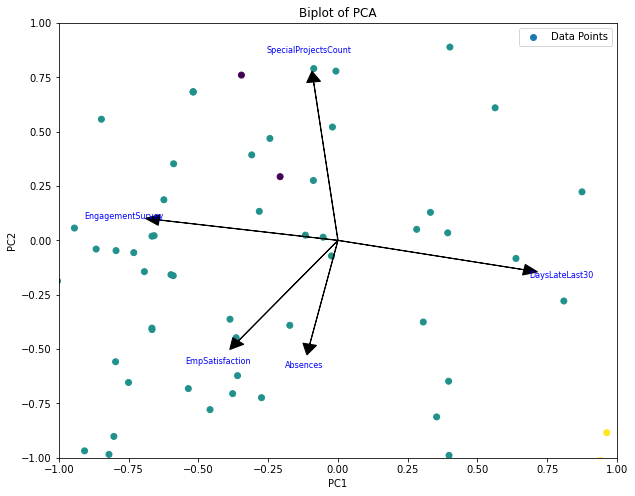

In [100]:
# Select the relevant columns for PCA
columns_for_pca = ['EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount', 'DaysLateLast30', 'Absences']
df = df[columns_for_pca]

# Handle missing values (NaN) by mean imputation
df = df.fillna(df.mean())

# Encode categorical columns (if any)
categorical_columns = []  # No categorical columns in this example
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Perform feature scaling
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

# Perform PCA
pca = PCA(n_components=2)  # Set the number of components to 2
X_pca = pca.fit_transform(df_scaled)

# Get the feature contributions for PC1 and PC2
feature_contributions = pd.DataFrame(pca.components_, columns=df_encoded.columns)

# Plot the biplot
plt.figure(figsize=(10, 8))

# Plot the data points
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', label='Data Points')

# Plot the feature vectors as arrows with smaller arrow heads
for feature in feature_contributions.columns:
    plt.arrow(0, 0, feature_contributions[feature][0], feature_contributions[feature][1],
              head_width=0.05, head_length=0.05, fc='black', ec='black')
    plt.text(feature_contributions[feature][0] * 1.2, feature_contributions[feature][1] * 1.2, feature,
             ha='center', va='center', color='blue', fontsize=8)

# Set the limits of the plot
plt.xlim([-1, 1])
plt.ylim([-1, 1])

# Add legend
plt.legend()

# Set the labels and title
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Biplot of PCA')

# Show the plot
plt.show()


In [102]:
# Assuming you have already performed PCA and obtained the transformed data X_pca

# Calculate the centroid in the principal component space
centroid = np.mean(X_pca, axis=0)

# Calculate the distances from the centroid
distances = np.linalg.norm(X_pca - centroid, axis=1)

# Set the outlier threshold as a multiple of the standard deviation
threshold = np.std(distances) * 2  # Adjust the multiplier as needed

# Find the indices of outliers
outlier_indices = np.where(distances > threshold)[0]

# Print the list of outliers
outliers = df.iloc[outlier_indices]
print("Outliers:")
outliers

# Analyze the outliers
# Look for common characteristics or patterns in the outliers such as extreme values or unusual combinations of features.


Outliers:


,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
1,1.078480,-1.030655,6,0,17
18,0.507934,0.134433,5,0,8
25,-0.732384,1.299521,7,0,2
53,-2.592859,-1.030655,0,5,16
85,-2.220764,-1.030655,0,5,19
86,-2.468828,1.299521,4,4,19
93,0.830416,1.299521,0,0,20
95,-2.592859,1.299521,0,4,7
112,-1.352542,-1.030655,0,3,10
119,1.128092,1.299521,0,0,17


we can observe the following common characteristics:

Low EngagementSurvey scores: Outliers 53, 85, and 95 have significantly low engagement survey scores, indicating lower levels of engagement compared to the rest of the data.

Extreme EmpSatisfaction values: Outliers 86 and 93 have high employee satisfaction scores, which deviate from the majority of the data.

Higher Absences: Outliers 85, 93, and 95 have relatively higher absence rates compared to the rest of the data.

Different Days Late Last30 and Special Projects Count: Outliers 53 and 86 have a higher number of days late in the last 30 days and a non-zero count of special projects, which might indicate specific work-related situations.

# Section C :